In [43]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'

PLOT_DATES_TEST_START = '2022-01-03'
PLOT_DATES_TEST_END = '2022-12-30'


# They replace close price with adjusted close price
df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()

print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (7500, 8)
         date        open        high         low       close     volume  \
0  2022-01-03  177.830002  182.880005  177.710007  179.273605  104487900   
1  2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2  2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3  2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4  2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   

    tic  day  
0  AAPL    0  
1  AMGN    0  
2   AXP    0  
3    BA    0  
4   CAT    0  


In [44]:
import pandas as pd


df = pd.DataFrame(df)

print(df.dtypes)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
tic               AAPL        AMGN         AXP          BA         CAT  \
date                                                                     
2022-01-03  179.273605  207.807144  161.699921  207.860001  195.760956   
2022-01-04  176.998352  208.861359  166.890915  213.630005  206.239334   
2022-01-05  172.290176  206.386292  165.112503  213.070007  207.818649   
2022-01-06  169.414108  206.413742  166.625534  211.339996  209.937042   
2022-01-07  169.581558  208.357147  168.051849  215.500000  212.017609   
...                ...         ...         ...         ...         ...   
2022-12-22  130.997910  250.844864  141.497940  188.250000  229.923325   
2022-12-23  130.631363  249.577682  143.163071  189.059998  232.178589   
2022-12-27  128.818405  249.076492  142.549606  189.399994  235.343750   
2022-12-28  124.865585  247.

<Axes: xlabel='date'>

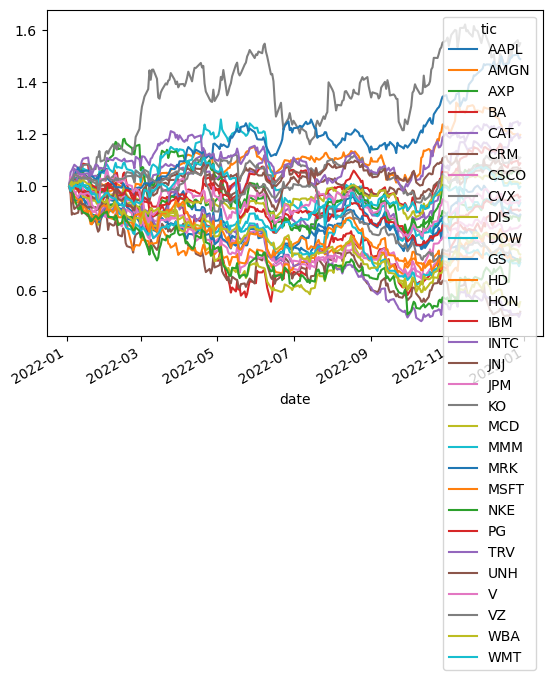

In [45]:
import matplotlib.pyplot as plt
# plot normalized prices of these stocks
(pivot_df / pivot_df.iloc[0,:]).plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary for window=3:
    Profit factor: 0.83
    Sharpe ratio: -0.92 ± 1.20
    Ulcer index: -1.12
    Information ratio (wrt benchmark): -0.99
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): -0.96 ± 1.01
    Beta / Alpha: 1.16 / -26.927%
    Annualized return: -33.55%
    Annualized volatility: 36.34%
    Longest drawdown: 239 days
    Max drawdown: 42.78%
    Winning days: 51.0%
    Annual turnover: 397.3
        
Summary for window=5:
    Profit factor: 0.95
    Sharpe ratio: -0.10 ± 1.01
    Ulcer index: -0.16
    Information ratio (wrt benchmark): 0.07
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): 0.13 ± 1.01
    Beta / Alpha: 1.28 / 3.762%
    Annualized return: -3.67%
    Annualized volatility: 38.28%
    Longest drawdown: 239 days
    Max drawdown: 38.49%
    Winning days: 48.6%
    Annual turnover: 290.7
        
Summary for window=10:
    Profit factor: 0.96
    Sharpe ratio: -0.07 ± 1.01
    Ulcer index: -0.11
    Informatio

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:277: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] > peak:
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

<Axes: xlabel='date', ylabel='Total wealth'>

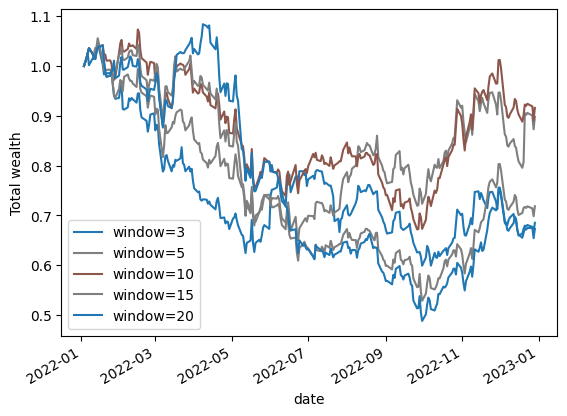

In [46]:
from online_algos import OLMAR, BCRP, BAH

list_result = OLMAR.run_combination(pivot_df, window=[3,5,10,15, 20], eps=10)
print(list_result.summary())
list_result.plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\tools.py:460: RuntimeWarning: invalid value encountered in scalar divide
  sh = mu / (sd + alpha) ** sd_factor
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\tools.py:432: RuntimeWarning: invalid value encountered in scalar divide
  return mu / np.sqrt((drawdown**2).mean())
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() i

            AAPL  AMGN  AXP   BA  CAT  CRM  CSCO  CVX  DIS  DOW  ...  MRK  \
date                                                             ...        
2022-01-03   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-01-04   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-01-05   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-01-06   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-01-07   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
...          ...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
2022-12-22   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-12-23   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-12-27   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-12-28   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   
2022-12-29   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0   

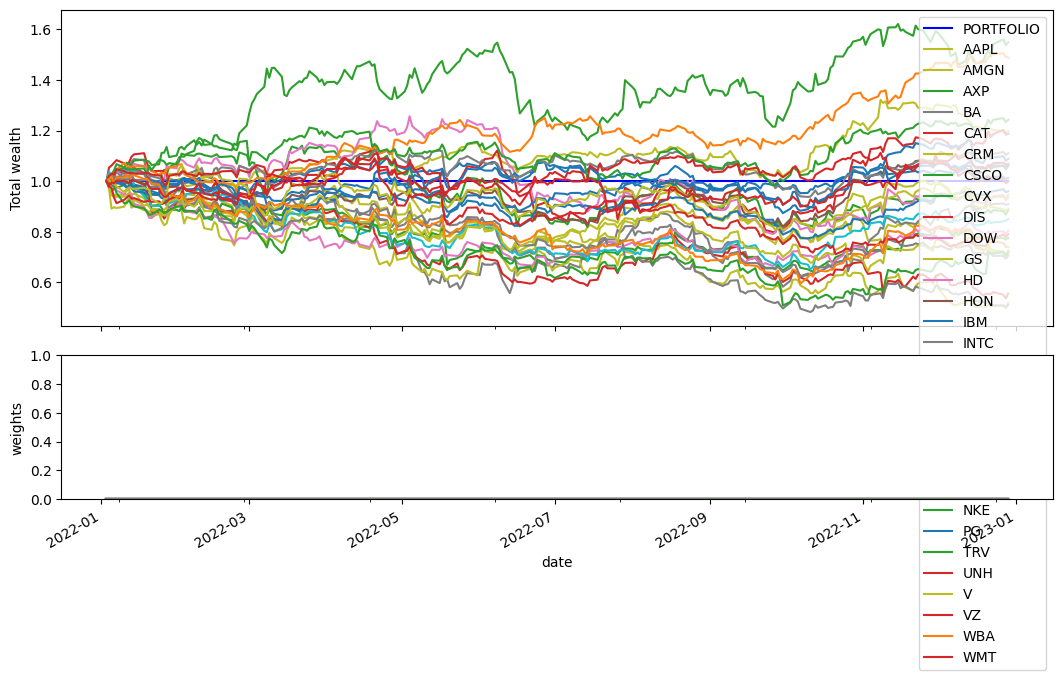

In [49]:
algo = BCRP()
result = algo.run(list_result)

bcrp_B = result.B
print(result.B)
bcrp_X = result.X
print(result.X)
print(result.summary())
result.plot();